# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

616


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | punta arenas.
Processing Record 1  of Set 1 | launceston.
Processing Record 2  of Set 1 | cape town.
Processing Record 3  of Set 1 | nizhneyansk.
City not found...skipping nizhneyansk.
Processing Record 4  of Set 1 | camana.
Processing Record 5  of Set 1 | haapiti.
Processing Record 6  of Set 1 | barrow.
Processing Record 7  of Set 1 | tahlequah.
Processing Record 8  of Set 1 | ossora.
Processing Record 9  of Set 1 | hami.
Processing Record 10  of Set 1 | kahului.
Processing Record 11  of Set 1 | mataura.
Processing Record 12  of Set 1 | norman wells.
Processing Record 13  of Set 1 | puerto escondido.
Processing Record 14  of Set 1 | hambantota.
Processing Record 15  of Set 1 | esperance.
Processing Record 16  of Set 1 | ushuaia.
Processing Record 17  of Set 1 | tuatapere.
Processing Record 18  of Set 1 | illoqqortoormiut.
City not found...skipping illoqqortoormiut.
Processing Record 19  of Set 1 | r

Processing Record 23  of Set 4 | plettenberg bay.
Processing Record 24  of Set 4 | la cruz.
Processing Record 25  of Set 4 | salalah.
Processing Record 26  of Set 4 | maniitsoq.
Processing Record 27  of Set 4 | nikolskoye.
Processing Record 28  of Set 4 | grand gaube.
Processing Record 29  of Set 4 | saldanha.
Processing Record 30  of Set 4 | chino valley.
Processing Record 31  of Set 4 | sisophon.
Processing Record 32  of Set 4 | praia da vitoria.
Processing Record 33  of Set 4 | hobyo.
Processing Record 34  of Set 4 | klaksvik.
Processing Record 35  of Set 4 | dire dawa.
Processing Record 36  of Set 4 | tsentralnyy.
City not found...skipping tsentralnyy.
Processing Record 37  of Set 4 | east london.
Processing Record 38  of Set 4 | ryotsu.
Processing Record 39  of Set 4 | hasaki.
Processing Record 40  of Set 4 | hualmay.
Processing Record 41  of Set 4 | pevek.
Processing Record 42  of Set 4 | nabire.
Processing Record 43  of Set 4 | macherla.
Processing Record 44  of Set 4 | mys shmi

Processing Record 3  of Set 8 | tabriz.
Processing Record 4  of Set 8 | cockburn town.
Processing Record 5  of Set 8 | leskolovo.
Processing Record 6  of Set 8 | sorong.
Processing Record 7  of Set 8 | liancheng.
Processing Record 8  of Set 8 | salinopolis.
Processing Record 9  of Set 8 | mabaruma.
Processing Record 10  of Set 8 | rawson.
Processing Record 11  of Set 8 | nuevo progreso.
Processing Record 12  of Set 8 | dhidhdhoo.
Processing Record 13  of Set 8 | maniwaki.
Processing Record 14  of Set 8 | provideniya.
Processing Record 15  of Set 8 | cairns.
Processing Record 16  of Set 8 | tafresh.
Processing Record 17  of Set 8 | anito.
Processing Record 18  of Set 8 | juazeirinho.
Processing Record 19  of Set 8 | bubaque.
Processing Record 20  of Set 8 | katherine.
Processing Record 21  of Set 8 | pasni.
Processing Record 22  of Set 8 | lasa.
Processing Record 23  of Set 8 | sao miguel do araguaia.
Processing Record 24  of Set 8 | port augusta.
Processing Record 25  of Set 8 | padang

Processing Record 31  of Set 11 | mahon.
Processing Record 32  of Set 11 | monaco-ville.
Processing Record 33  of Set 11 | chara.
Processing Record 34  of Set 11 | koboldo.
City not found...skipping koboldo.
Processing Record 35  of Set 11 | fuling.
Processing Record 36  of Set 11 | ptichye.
Processing Record 37  of Set 11 | belfast.
Processing Record 38  of Set 11 | gweta.
Processing Record 39  of Set 11 | vilhena.
Processing Record 40  of Set 11 | dingle.
Processing Record 41  of Set 11 | adrar.
Processing Record 42  of Set 11 | platanos.
Processing Record 43  of Set 11 | khash.
Processing Record 44  of Set 11 | buin.
Processing Record 45  of Set 11 | bilma.
Processing Record 46  of Set 11 | oshogbo.
Processing Record 47  of Set 11 | senanga.
Processing Record 48  of Set 11 | kochki.
Processing Record 49  of Set 11 | san quintin.
Processing Record 0  of Set 12 | leona vicario.
Processing Record 1  of Set 12 | banjar.
Processing Record 2  of Set 12 | yatou.
Processing Record 3  of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Data Count
weather_df.count()

City                616
Country             616
Date                616
Latitude            616
Longitude           616
Cloudiness (%)      616
Humidity (%)        616
Max Temp (F)        616
Wind Speed (mph)    616
dtype: int64

In [7]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,punta arenas,CL,2020-04-13 18:00:36,-53.15,-70.92,75,71,52.07,6.2
1,launceston,AU,2020-04-13 18:00:37,-41.45,147.17,90,87,59.27,6.2
2,cape town,ZA,2020-04-13 17:50:02,-33.93,18.42,20,82,57.47,2.1
3,nizhneyansk,,,,,,,,
4,camana,PE,2020-04-13 18:00:37,-16.62,-72.71,92,74,71.906,3.17


In [8]:
# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

The plot proves that as we generally move away from the equator, temperature drops


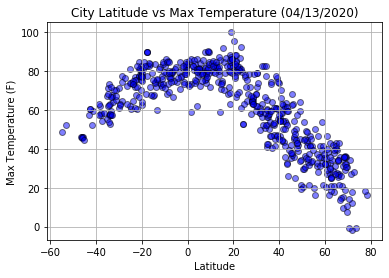

In [28]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.grid(True)
print("The plot proves that as we generally move away from the equator, temperature drops")

#### Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


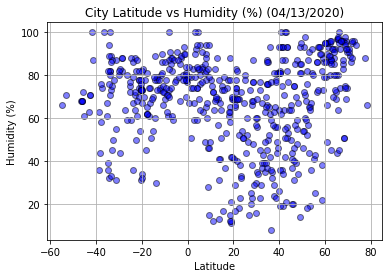

In [29]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
plt.grid(True)
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

#### Latitude vs. Cloudiness Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


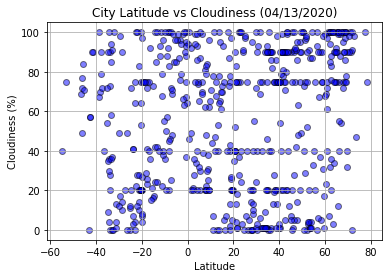

In [30]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.grid(True)
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")

#### Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


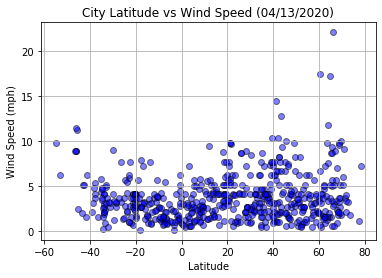

In [31]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.grid(True)
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.96x + 91.64
The r-squared is: -0.890274615845831
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


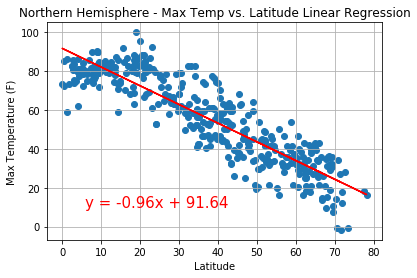

In [32]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.62x + 84.42
The r-squared is: 0.7687847463382067
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


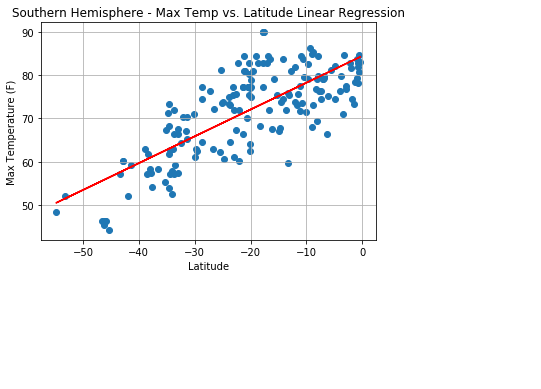

In [33]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.27x + 55.85
The r-squared is: 0.2402305198386487
The regression does not display much of a correlation between the data sets.


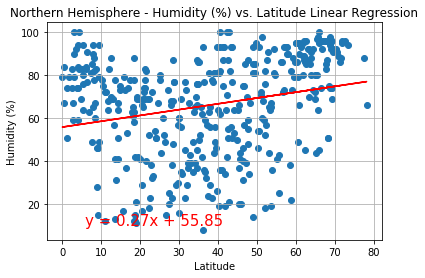

In [34]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.27x + 77.9
The r-squared is: 0.22982573438372633
The regression does not display much of a correlation between the data sets.


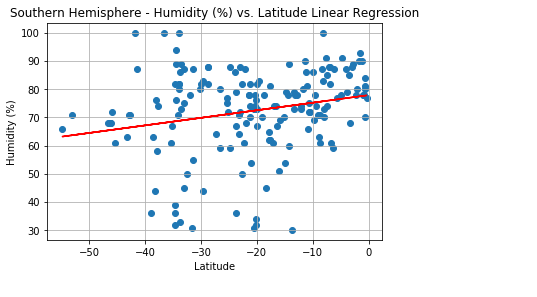

In [35]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.37x + 42.49
The r-squared is: 0.21364502803860094
The regression does not display much of a correlation between the data sets.


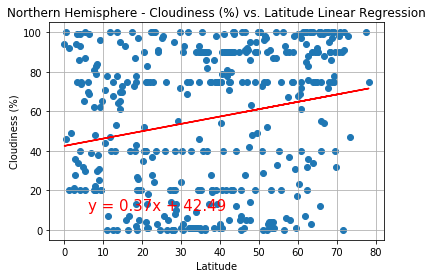

In [36]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.56x + 66.21
The r-squared is: 0.21726848156538525
The regression does not display much of a correlation between the data sets.


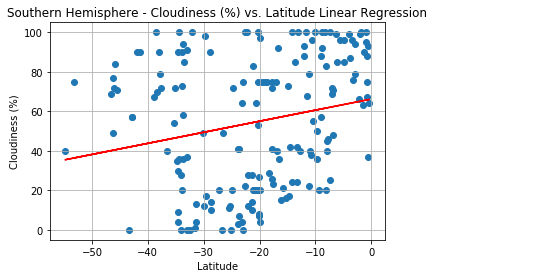

In [37]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x + 3.16
The r-squared is: 0.14355482153097116
The regression does not display much of a correlation between the data sets.


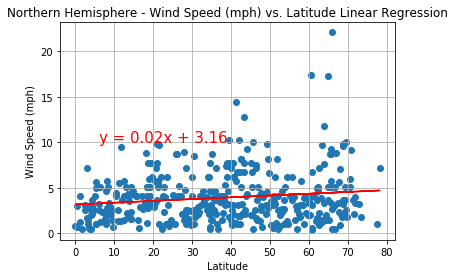

In [38]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.07x + 1.73
The r-squared is: -0.43297163786137055
The regression does not display much of a correlation between the data sets.


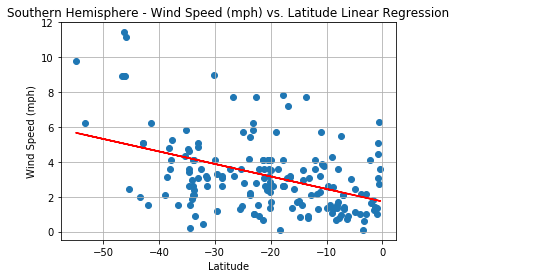

In [39]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()